In [1]:
import sys
sys.path.append("..")

from src import MaxmindIp
from helpers import function_time


TOTAL_TIME = 10*60*60
SECTION_TIME = int(TOTAL_TIME / 4)
SEARCH_TIME = int(SECTION_TIME / 4)

Checking whether there is an H2O instance running at http://34.205.171.33:54321 . connected.


H2O_cluster_uptime:,1 day 1 hour 22 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,2 days
H2O_cluster_name:,root
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,44.47 Gb
H2O_cluster_total_cores:,36
H2O_cluster_allowed_cores:,36
H2O_cluster_status:,"locked, healthy"


In [2]:
permutations = {'trial_1': {'model_type': 'AutoML', 'cost_matrix_loss_metric': False},
                'trial_2': {'model_type': 'GradientBoosting', 'cost_matrix_loss_metric': False},
                'trial_3': {'model_type': 'GradientBoosting', 'cost_matrix_loss_metric': True}}

{'model_type': 'AutoML', 'cost_matrix_loss_metric': False}


/Users/kerrirapes/Documents/Projects/sendwave/analysis/email_maxmind/emaxmind/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


data available: 14628772
data length: 12039556
Date: 2020-05-24 00:00:00       Lookback: 270   Step: 90
Parse progress: |█████████████████████████████████████████████████████████| 100%


INFO:root:Training AutoML


AutoML progress: |████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
optimum_threshold: 0.07
Could not find exact threshold 0.07; using closest threshold found 0.06994781201798565.

Confusion Matrix (Act/Pred) @ threshold = 0.06994781201798565: 


,,0,1,Error,Rate
0,0,8978.0,576.0,0.0603,(576.0/9554.0)
1,1,250.0,211.0,0.5423,(250.0/461.0)
2,Total,9228.0,787.0,0.0825,(826.0/10015.0)



Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
The modified system has an impact of -6198211.4
new_approach: -77441524.30000018  -  today: -71243312.89999998


H2OServerError: HTTP 500 Server Error:
Server error java.lang.RuntimeException:
  Error: multiple descriptors?: [B$Icer
  Request: None


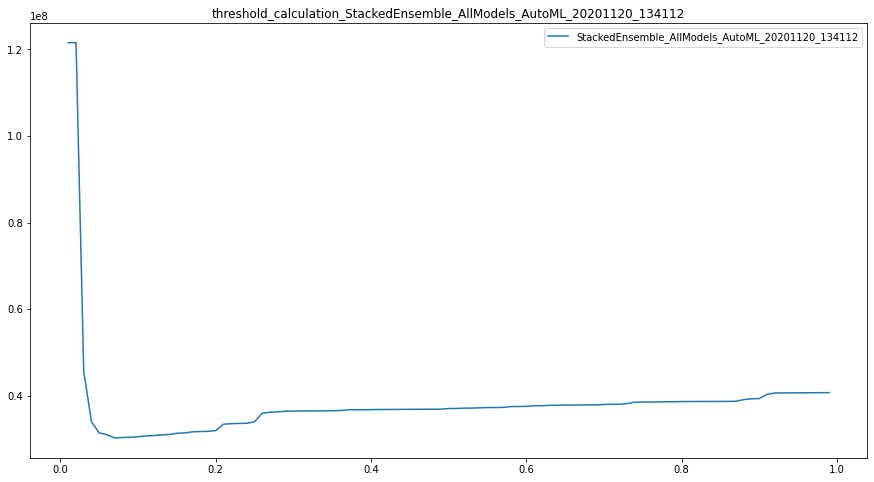

In [3]:
trial = permutations['trial_1']
print(trial)

maxmind = MaxmindIp()
maxmind.config['step'] = 90
data = maxmind.train(reset_lookback=False,
                     reset_step=False,
                     sample_size=None,
                     model_type=trial['model_type'],
                     cost_matrix_loss_metric=trial['cost_matrix_loss_metric'],
                     search_time=60*2,
                     evaluate=True)

volume_based_config = maxmind.configure_volume_equals_baseline(search_time=-1)

In [ ]:
trial = permutations['trial_1']
print(trial)

maxmind = MaxmindIp()
maxmind.config = volume_based_config
maxmind.config['step'] = 90
data = maxmind.train(reset_lookback=False,
                     reset_step=False,
                     sample_size=None,
                     model_type=trial['model_type'],
                     cost_matrix_loss_metric=trial['cost_matrix_loss_metric'],
                     search_time=SEARCH_TIME,
                     evaluate=True)


In [ ]:
maxmind.plot_vs_baseline()

In [ ]:
maxmind.stats_volume_vs_baseline()

In [ ]:
maxmind.stats_fp_vs_baseline()

In [ ]:
maxmind.stats_tp_vs_baseline()

In [ ]:
permutations['trial_1']['impact'] = maxmind.cost_impact()

In [ ]:
trial = permutations['trial_2']
print(trial)

maxmind = MaxmindIp()
maxmind.config['step'] = 90
maxmind.config = volume_based_config
data = maxmind.train(reset_lookback=False,
                     reset_step=False,
                     sample_size=None,
                     model_type=trial['model_type'],
                     cost_matrix_loss_metric=trial['cost_matrix_loss_metric'],
                     search_time=SEARCH_TIME,
                     evaluate=True)

In [ ]:
maxmind.plot_vs_baseline()

In [ ]:
maxmind.stats_volume_vs_baseline()

In [ ]:
maxmind.stats_fp_vs_baseline()

In [ ]:
maxmind.stats_tp_vs_baseline()

In [ ]:
permutations['trial_2']['impact'] = maxmind.cost_impact()

In [ ]:
trial = permutations['trial_3']
print(trial)

maxmind = MaxmindIp()
maxmind.config['step'] = 90
maxmind.config = volume_based_config
data = maxmind.train(reset_lookback=False,
                     reset_step=False,
                     sample_size=None,
                     model_type=trial['model_type'],
                     cost_matrix_loss_metric=trial['cost_matrix_loss_metric'],
                     search_time=SEARCH_TIME,
                     evaluate=True)

In [ ]:
maxmind.plot_vs_baseline()

In [ ]:
maxmind.stats_volume_vs_baseline()

In [ ]:
maxmind.stats_fp_vs_baseline()

In [ ]:
maxmind.stats_tp_vs_baseline()

In [ ]:
permutations['trial_3']['impact'] = maxmind.cost_impact()